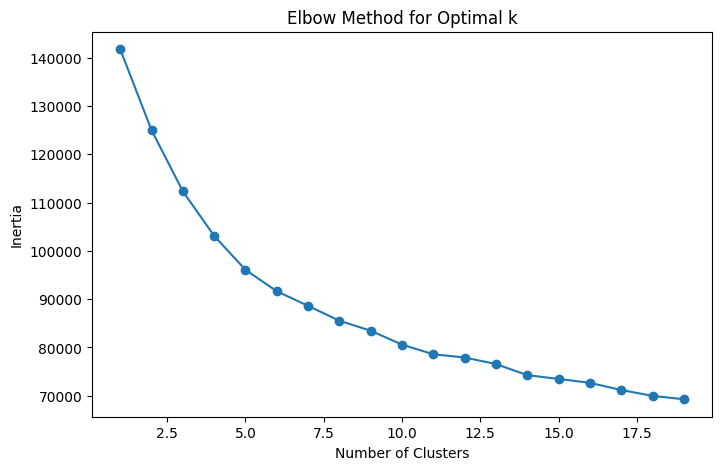

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df=pd.read_csv('../BankChurners.csv')

del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(columns = ['CLIENTNUM'])

# Choosing numerical columns    
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
data_numeric = df[numeric_columns]

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Determine optimal number of clusters
inertia = []
k_range = range(1,20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graphical representation
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# KMeans clustering
optimal_k = 6  # Elbow method a gore belirlenen kume sayisi 4-6 arasinda olabilir
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster information to the dataframe
df['cluster'] = clusters

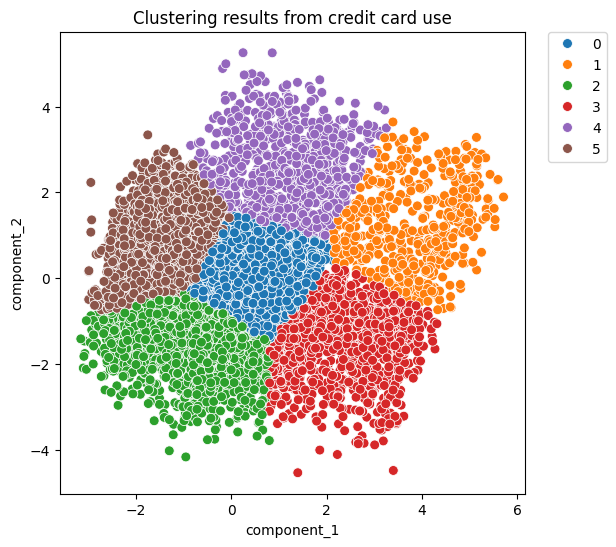

In [3]:


preprocessor = Pipeline(
[
 ("scaler", StandardScaler()),
 ("pca", PCA(n_components=2, random_state=1))
]
)

clusterer = Pipeline(
     [
       (
              "kmeans",
               KMeans(
                   n_clusters=6,
                   init="k-means++",
                   n_init=50,
                   max_iter=1000,
                   random_state=1
                      )
       )
      ]
   )
pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )


pipe.fit(df[numeric_columns])
Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=1000, n_clusters=6, n_init=50,
                                         random_state=1))]))])

pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(df[numeric_columns]),
        columns=["component_1", "component_2"]
    )
   
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.figure(figsize=(6, 6))
   
sp = sns.scatterplot(
        x="component_1",
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        palette='tab10'
    )
   
sp.set_title("Clustering results from credit card use")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()


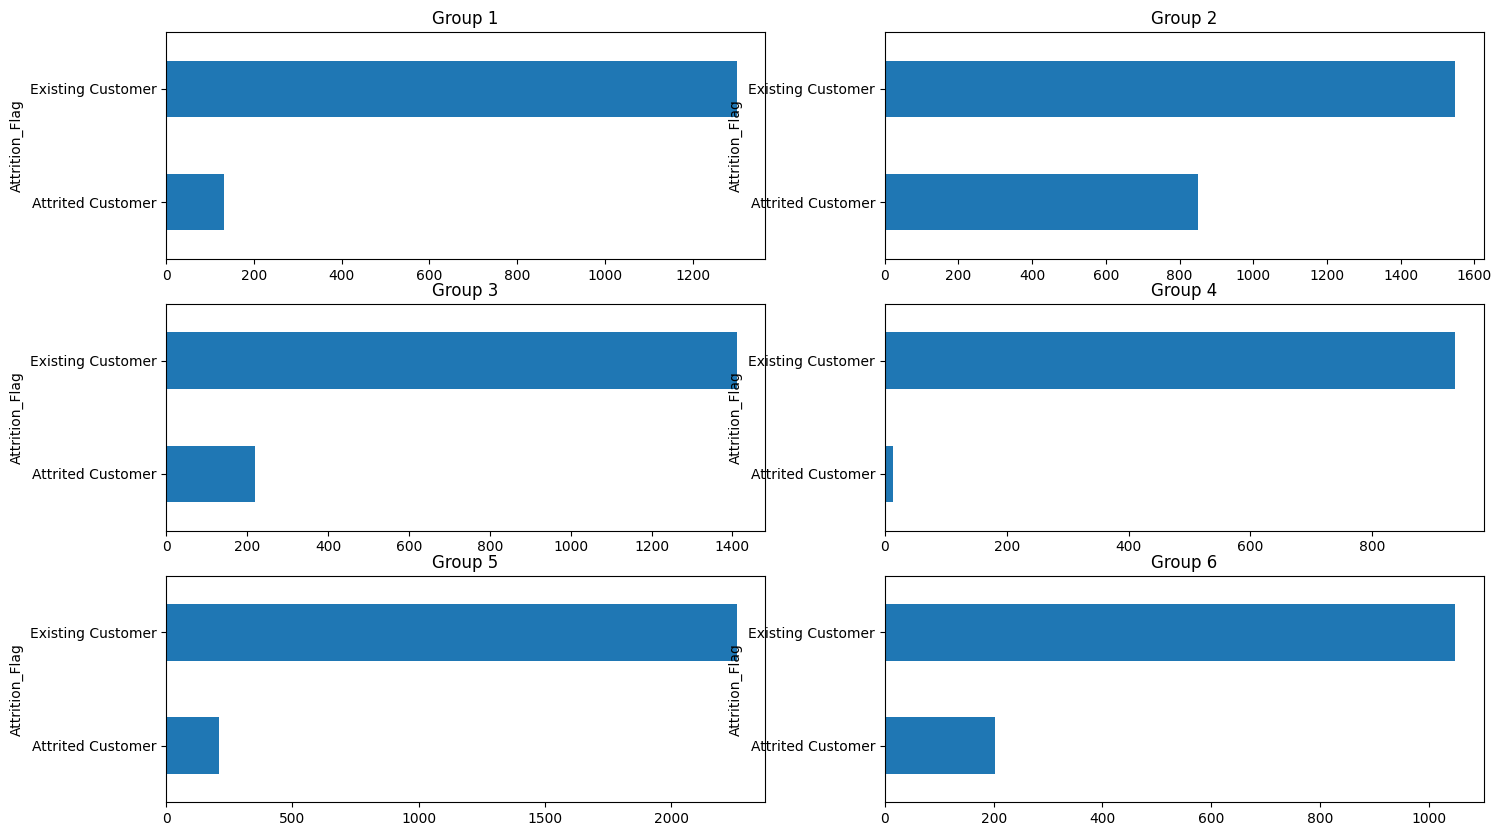

In [4]:
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(17,10))

df[df['cluster'] == 0]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0,0], title='Group 1')
df[df['cluster'] == 1]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[0,1], title='Group 2')
df[df['cluster'] == 2]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1,0], title='Group 3')
df[df['cluster'] == 3]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[1,1], title='Group 4')
df[df['cluster'] == 4]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2,0], title='Group 5')
df[df['cluster'] == 5]['Attrition_Flag'].value_counts().sort_index().plot.barh(ax=axs[2,1], title='Group 6')
plt.show()

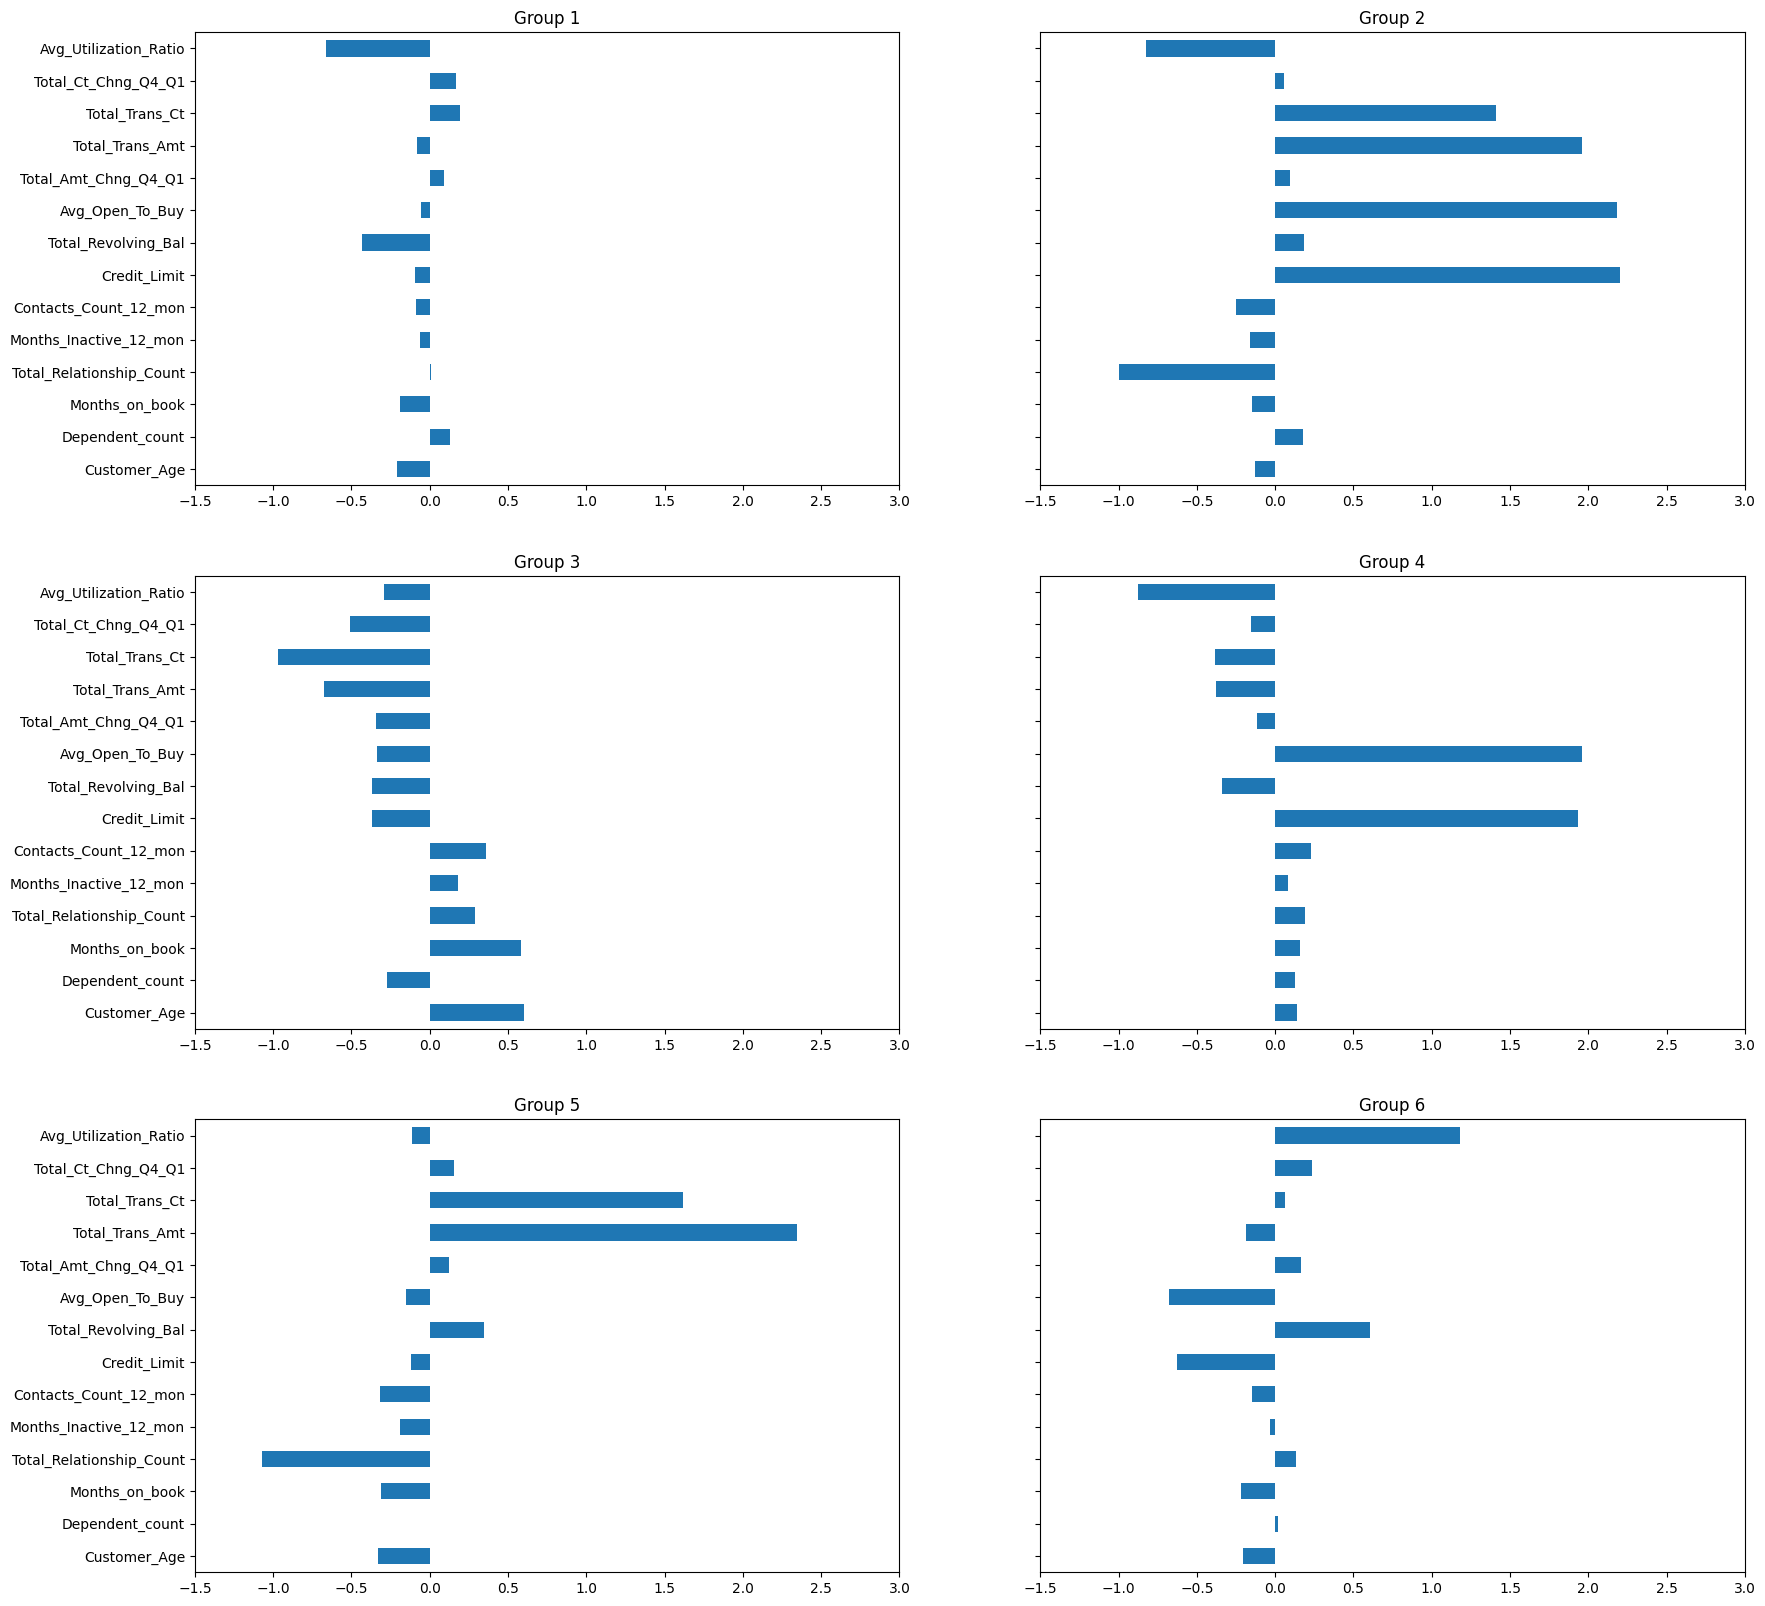

In [5]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)
scaled_df['cluster'] = pipe['clusterer']['kmeans'].labels_

fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(20,32))

scaled_df[scaled_df['cluster'] == 0][numeric_columns].mean().plot.barh(ax=axs[0,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 1')
scaled_df[scaled_df['cluster'] == 1][numeric_columns].mean().plot.barh(ax=axs[0,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 2')
scaled_df[scaled_df['cluster'] == 2][numeric_columns].mean().plot.barh(ax=axs[1,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 3')
scaled_df[scaled_df['cluster'] == 3][numeric_columns].mean().plot.barh(ax=axs[1,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 4')
scaled_df[scaled_df['cluster'] == 4][numeric_columns].mean().plot.barh(ax=axs[2,0], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 5')
scaled_df[scaled_df['cluster'] == 5][numeric_columns].mean().plot.barh(ax=axs[2,1], xlim=(-1.5, 3), figsize=(20,20), sharey=True, title='Group 6')
plt.show()

Gender

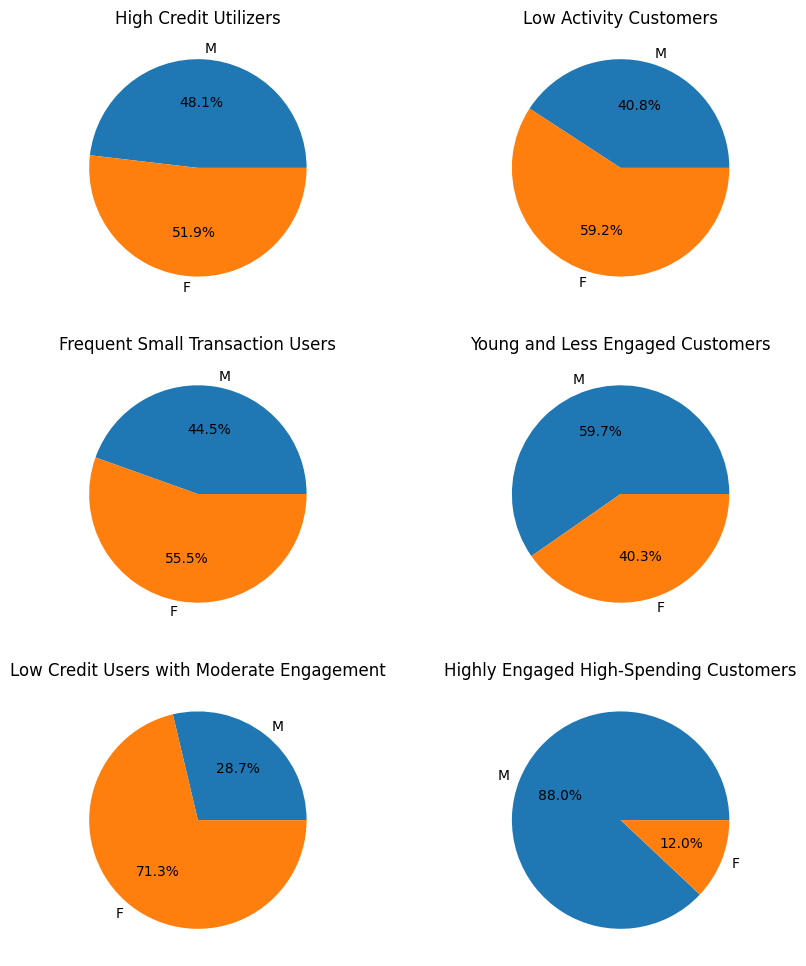

In [6]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(10,12))

df[df['cluster'] == 0]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,0], ylabel='', title='High Credit Utilizers', autopct='%.1f%%')
df[df['cluster'] == 1]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[0,1], ylabel='', title='Low Activity Customers', autopct='%.1f%%')
df[df['cluster'] == 2]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,0], ylabel='', title='Frequent Small Transaction Users', autopct='%.1f%%')
df[df['cluster'] == 3]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[1,1], ylabel='', title='Young and Less Engaged Customers', autopct='%.1f%%')
df[df['cluster'] == 4]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,0], ylabel='', title='Low Credit Users with Moderate Engagement', autopct='%.1f%%')
df[df['cluster'] == 5]['Gender'].value_counts().sort_index(ascending=False).plot.pie(ax=axs[2,1], ylabel='', title='Highly Engaged High-Spending Customers', autopct='%.1f%%')
plt.show()

Card Type

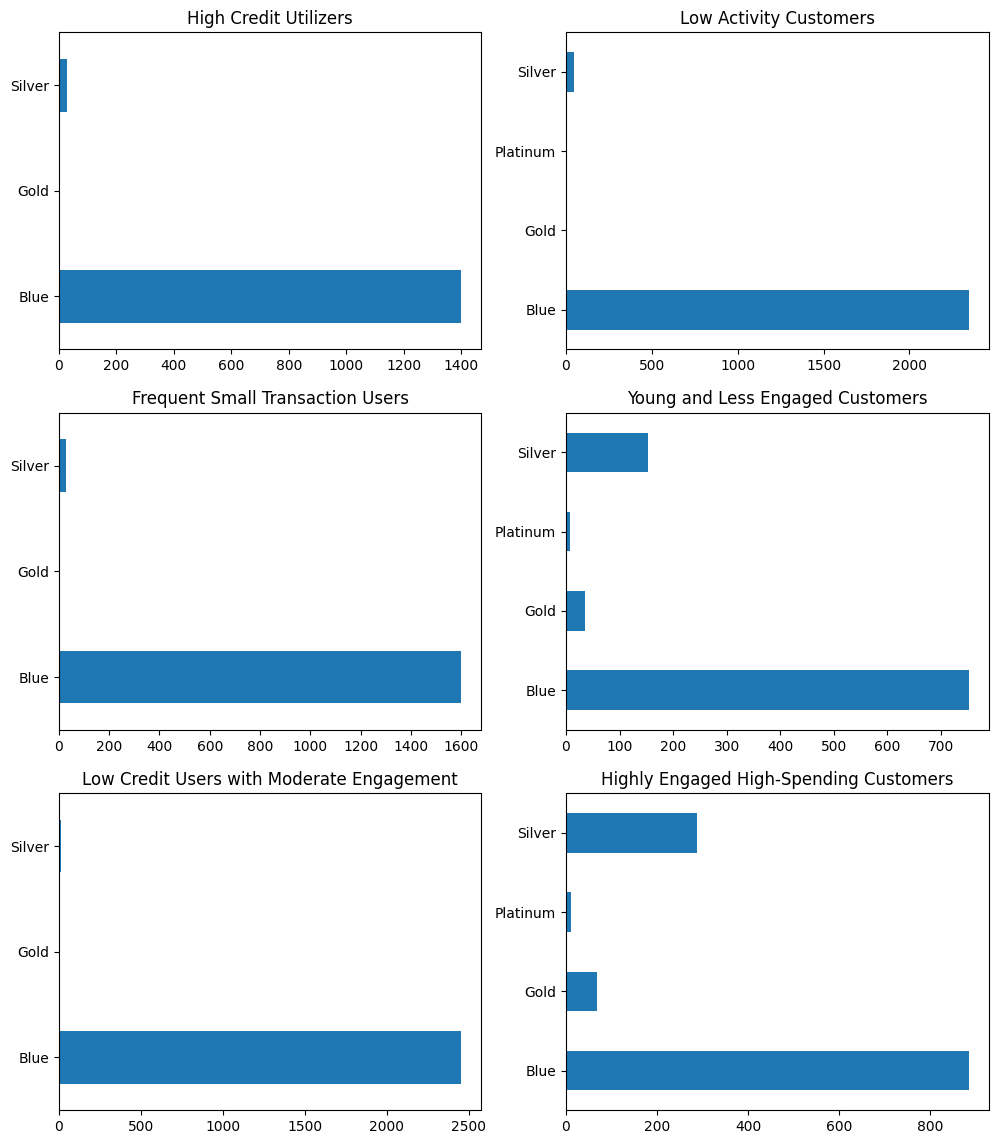

In [7]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

df[df['cluster'] == 0]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[0,0], ylabel='', title='High Credit Utilizers')
df[df['cluster'] == 1]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[0,1], ylabel='', title='Low Activity Customers')
df[df['cluster'] == 2]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[1,0], ylabel='', title='Frequent Small Transaction Users')
df[df['cluster'] == 3]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[1,1], ylabel='', title='Young and Less Engaged Customers')
df[df['cluster'] == 4]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[2,0], ylabel='', title='Low Credit Users with Moderate Engagement')
df[df['cluster'] == 5]['Card_Category'].value_counts().sort_index().plot.barh(ax=axs[2,1], ylabel='', title='Highly Engaged High-Spending Customers')
plt.show()

Marital Status

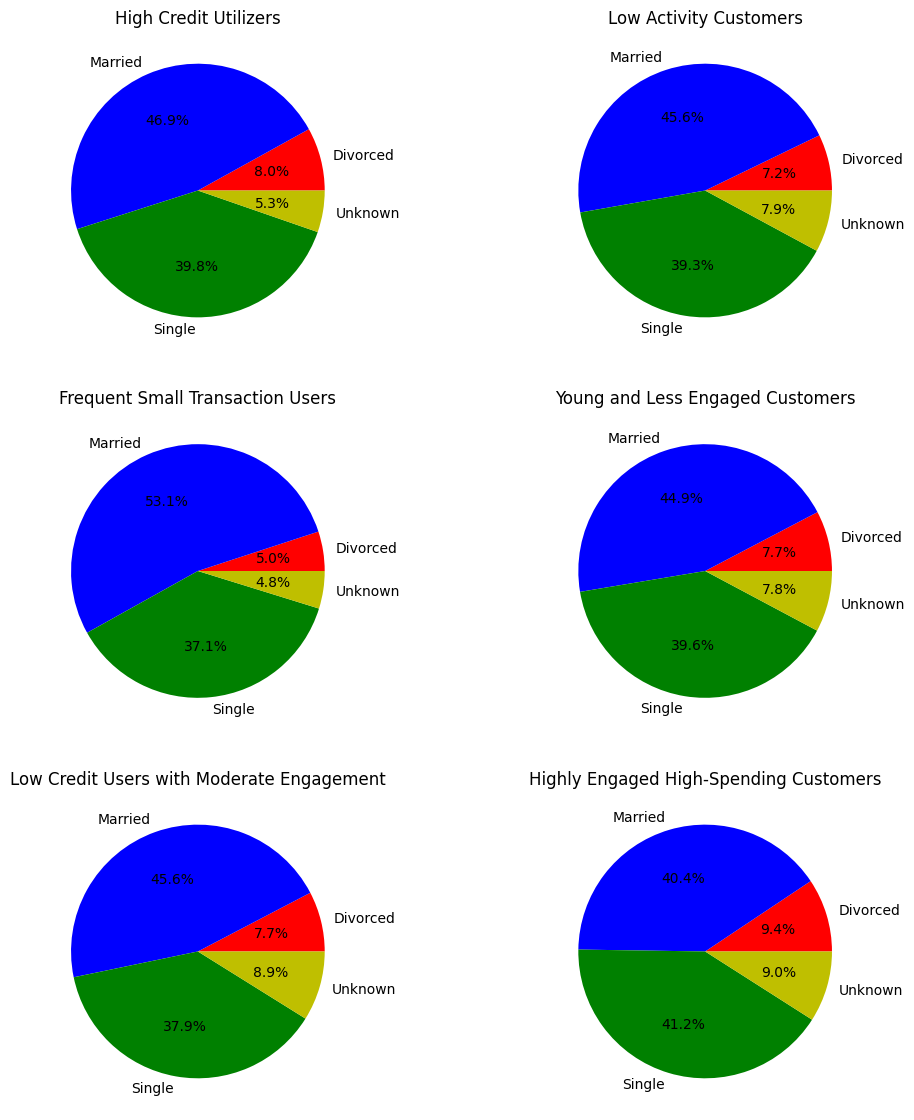

In [8]:
fix, axs = plt.subplots(ncols=2,nrows=3, figsize=(12,14))

df[df['cluster'] == 0]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[0,0], ylabel='', title='High Credit Utilizers', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 1]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[0,1], ylabel='', title='Low Activity Customers', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 2]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,0], ylabel='', title='Frequent Small Transaction Users', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 3]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[1,1], ylabel='', title='Young and Less Engaged Customers', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 4]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[2,0], ylabel='', title='Low Credit Users with Moderate Engagement', colors=['r','b','g','y'], autopct='%.1f%%')
df[df['cluster'] == 5]['Marital_Status'].value_counts().sort_index().plot(kind='pie', ax=axs[2,1], ylabel='', title='Highly Engaged High-Spending Customers', colors=['r','b','g','y'], autopct='%.1f%%')
plt.show()